# Medical Data Visualizer 
## Course Project: Data Analysis with Python Certification (*freeCodeCamp*)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in 
kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [2]:
# Add 'overweight' column
df['bmi'] = df['weight']/(((df['height'])/100)**2)     
df['overweight'] = [1 if x > 25 else 0 for x in df['bmi']]
df.head()   

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [3]:
# Normalize data 
df['gluc'] = [1 if x > 1 else 0 for x in df['gluc']]
print(df['gluc'].value_counts())

df['cholesterol'] = [1 if x > 1 else 0 for x in df['cholesterol']]
df['cholesterol'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64


0    52385
1    17615
Name: cholesterol, dtype: int64

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 

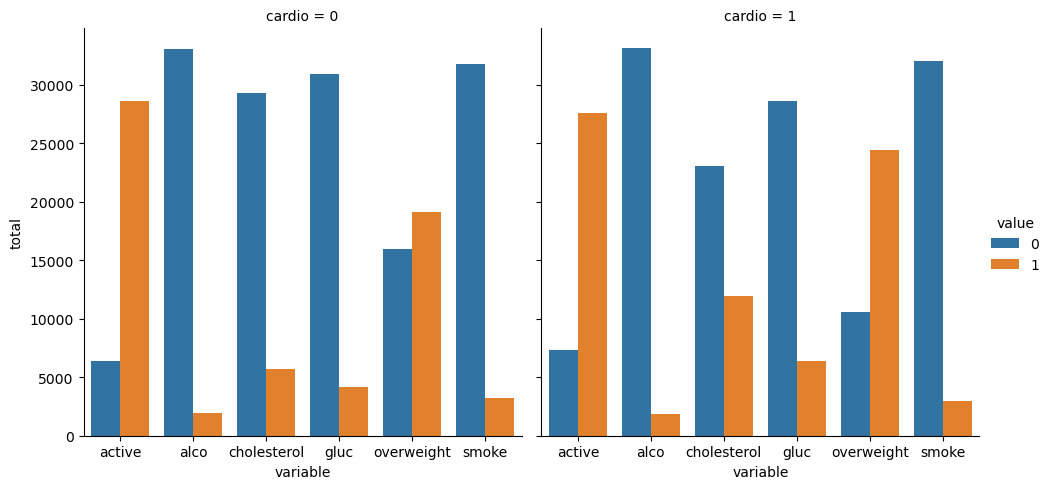

In [4]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars =['cardio'], value_vars =['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).value_counts()
    df_cat.rename(columns = {'count':'total'}, inplace = True)
    
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x="variable", y="total", hue = "value", kind ='bar', col="cardio", data=df_cat)

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()



**Step 1:** Clean the data. Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

**Step 2:** Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

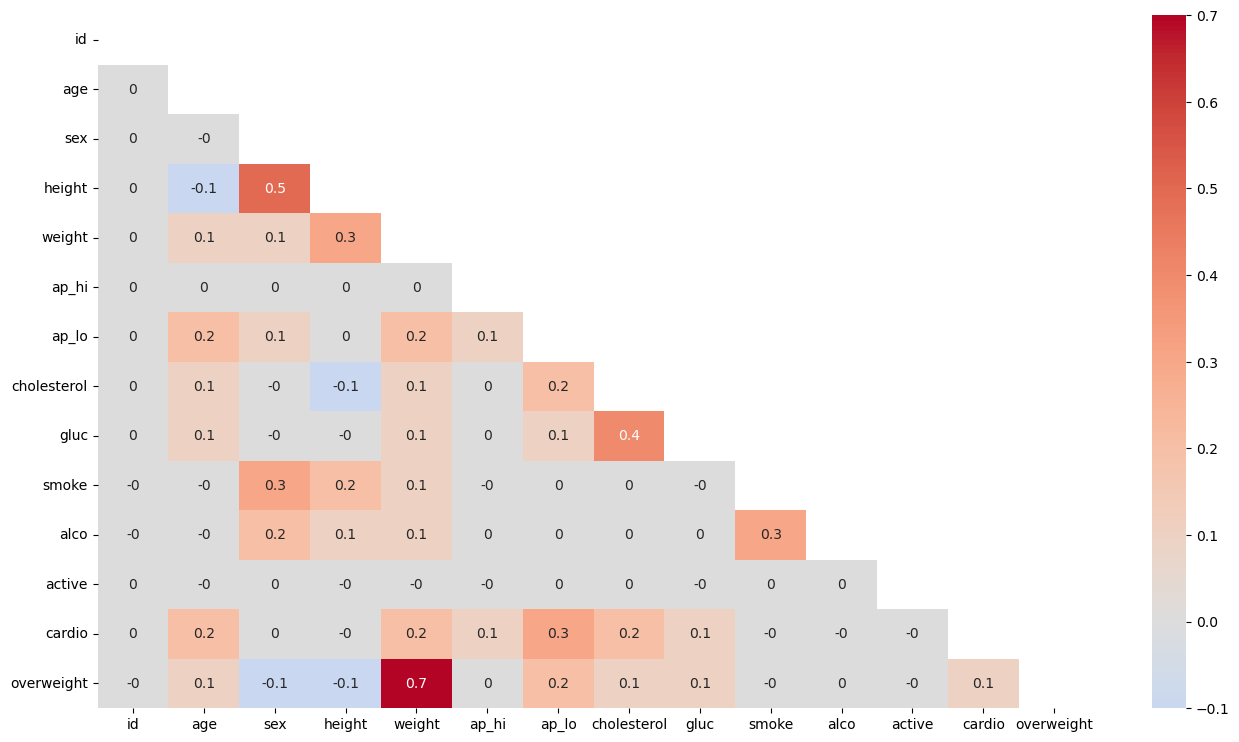

In [9]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) & 
       (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &
       (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
    #remove bmi column 
    df_heat = df_heat.drop(['bmi'], axis=1)
    # Calculate the correlation matrix
    corr =  round(df_heat.corr(),1)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    plt.figure(figsize=(16,9))

    # Draw the heatmap with 'sns.heatmap()'
    hm = sns.heatmap(corr, mask = mask, annot = True, center = 0, cmap = "coolwarm")
    fig = hm.figure
    return fig

    # Do not modify the next two lines
    fig.savefig('heatmap.png')

draw_heat_map()